# NAGALAND

In [448]:
import pandas as pd

# Load the datasets for Nagaland
df_ng_enrolment = pd.read_csv('/content/Nagaland Enrolment Dataset.csv')
df_ng_demographic = pd.read_csv('/content/Nagaland Demographic Dataset.csv')
df_ng_biometric = pd.read_csv('/content/Nagaland Biometric Dataset.csv')

print("Nagaland Enrolment Dataset:")
print(df_ng_enrolment.head())
print(df_ng_enrolment.info())
print(df_ng_enrolment.describe())

print("\nNagaland Demographic Dataset:")
print(df_ng_demographic.head())
print(df_ng_demographic.info())
print(df_ng_demographic.describe())

print("\nNagaland Biometric Dataset:")
print(df_ng_biometric.head())
print(df_ng_biometric.info())
print(df_ng_biometric.describe())

Nagaland Enrolment Dataset:
         date     state    district  pincode  age_0_5  age_5_17  \
0  01-09-2025  Nagaland     Dimapur   797116        0         2   
1  01-09-2025  Nagaland      Kohima   797003        0         2   
2  01-09-2025  Nagaland    Longleng   798625        1         4   
3  01-09-2025  Nagaland  Mokokchung   798601        0         1   
4  01-09-2025  Nagaland         Mon   798622        1         5   

   age_18_greater  
0               0  
1               0  
2               0  
3               0  
4               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            2265 non-null   object
 1   state           2265 non-null   object
 2   district        2265 non-null   object
 3   pincode         2265 non-null   int64 
 4   age_0_5         2265 non-null   int64 
 5   age_5_17        2265 non-null 

In [449]:
# Convert 'date' column to datetime objects
df_ng_enrolment['date'] = pd.to_datetime(df_ng_enrolment['date'], format='%d-%m-%Y')
df_ng_demographic['date'] = pd.to_datetime(df_ng_demographic['date'], format='%d-%m-%Y')
df_ng_biometric['date'] = pd.to_datetime(df_ng_biometric['date'], format='%d-%m-%Y')

print("Data types after conversion for df_enrolment:")
print(df_ng_enrolment.info())
print("\nData types after conversion for df_demographic:")
print(df_ng_demographic.info())
print("\nData types after conversion for df_biometric:")
print(df_ng_biometric.info())

Data types after conversion for df_enrolment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            2265 non-null   datetime64[ns]
 1   state           2265 non-null   object        
 2   district        2265 non-null   object        
 3   pincode         2265 non-null   int64         
 4   age_0_5         2265 non-null   int64         
 5   age_5_17        2265 non-null   int64         
 6   age_18_greater  2265 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 124.0+ KB
None

Data types after conversion for df_demographic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4663 entries, 0 to 4662
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4663 non-null   datetime64[

In [450]:
merged_ng_df_temp = pd.merge(df_ng_enrolment, df_ng_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_ng_merged = pd.merge(merged_ng_df_temp, df_ng_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numeric columns
numeric_cols = df_ng_merged.select_dtypes(include=['number']).columns

# Replace NaN values in numeric columns with 0
df_ng_merged[numeric_cols] = df_ng_merged[numeric_cols].fillna(0)

print("Merged Nagaland DataFrame (df_ng_merged) head:")
print(df_ng_merged.head())
print("\nMerged Nagaland DataFrame (df_ng_merged) info:")
print(df_ng_merged.info())

print("Shape of df_ng_merged:", df_ng_merged.shape)
print("\nDescription of df_ng_merged:")
print(df_ng_merged.describe())

df_ng = df_ng_merged[df_ng_merged['state'] == 'Nagaland'].copy()
df_ng['year'] = df_ng['date'].dt.year
df_ng['month'] = df_ng['date'].dt.month

print("\nShape of df_ng:", df_ng.shape)
print("\nFirst 5 rows of df_ng with new 'year' and 'month' columns:")
print(df_ng.head())

Merged Nagaland DataFrame (df_ng_merged) head:
        date     state     district  pincode  age_0_5  age_5_17  \
0 2025-03-01  Nagaland  Chumukedima   797103      0.0       0.0   
1 2025-03-01  Nagaland  Chumukedima   797115      0.0       0.0   
2 2025-03-01  Nagaland      Dimapur   797103      0.0       0.0   
3 2025-03-01  Nagaland      Dimapur   797106      0.0       0.0   
4 2025-03-01  Nagaland      Dimapur   797112      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0             0.0           18.0         145.0           0.0          0.0  
1             0.0           22.0         151.0           0.0          0.0  
2             0.0           27.0         231.0         155.0        381.0  
3             0.0            0.0           0.0          28.0         97.0  
4             0.0          139.0        1014.0         536.0       1270.0  

Merged Nagaland DataFrame (df_ng_merged) info:
<class 'pandas.core.frame.DataFrame'>
RangeInd

In [451]:
age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_ng_agg = df_ng.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

print("Aggregated DataFrame (df_ng_agg) head:")
print(df_ng_agg.head())
print("\nAggregated DataFrame (df_ng_agg) info:")
print(df_ng_agg.info())

Aggregated DataFrame (df_ng_agg) head:
   year  month     state     district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Nagaland  Chumukedima      0.0       0.0             0.0   
1  2025      3  Nagaland      Dimapur      0.0       0.0             0.0   
2  2025      3  Nagaland      Kiphire      0.0       0.0             0.0   
3  2025      3  Nagaland       Kohima      0.0       0.0             0.0   
4  2025      3  Nagaland     Longleng      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0           40.0         296.0           0.0          0.0  
1          217.0        1642.0        1135.0       2360.0  
2           60.0         682.0         173.0        388.0  
3           24.0         448.0         298.0       1799.0  
4            0.0           0.0          98.0        398.0  

Aggregated DataFrame (df_ng_agg) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 11 columns):

In [452]:
import numpy as np

# 1. Create 'totalenrolments' column
df_ng_agg['totalenrolments'] = df_ng_agg['age_0_5'] + df_ng_agg['age_5_17'] + df_ng_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_ng_agg['childenrolments'] = df_ng_agg['age_0_5'] + df_ng_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_ng_agg['totaldemoupdates'] = df_ng_agg['demo_age_5_17'] + df_ng_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_ng_agg['totalbioupdates'] = df_ng_agg['bio_age_5_17'] + df_ng_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_ng_agg['CES'] = np.where(
    df_ng_agg['totalenrolments'] == 0,
    0,
    df_ng_agg['childenrolments'] / df_ng_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_ng_agg['DUR'] = np.where(
    df_ng_agg['totalenrolments'] == 0,
    0,
    df_ng_agg['totaldemoupdates'] / df_ng_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_ng_agg['BUR'] = np.where(
    df_ng_agg['totalenrolments'] == 0,
    0,
    df_ng_agg['totalbioupdates'] / df_ng_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_ng_agg) with new metrics head:")
print(df_ng_agg.head())

Aggregated DataFrame (df_ng_agg) with new metrics head:
   year  month     state     district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Nagaland  Chumukedima      0.0       0.0             0.0   
1  2025      3  Nagaland      Dimapur      0.0       0.0             0.0   
2  2025      3  Nagaland      Kiphire      0.0       0.0             0.0   
3  2025      3  Nagaland       Kohima      0.0       0.0             0.0   
4  2025      3  Nagaland     Longleng      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  totalenrolments  \
0           40.0         296.0           0.0          0.0              0.0   
1          217.0        1642.0        1135.0       2360.0              0.0   
2           60.0         682.0         173.0        388.0              0.0   
3           24.0         448.0         298.0       1799.0              0.0   
4            0.0           0.0          98.0        398.0              0.0   

   childenrolments

In [453]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_ng_agg['Enorm'] = df_ng_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_ng_agg['Dnorm'] = df_ng_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year', 'month' and 'state'
df_ng_agg['Bnorm'] = df_ng_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_ng_agg['stdnorm'] = (df_ng_agg['Enorm'] + df_ng_agg['Dnorm'] + df_ng_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_ng_agg['ALBI'] = 1 - df_ng_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_ng_agg['ALBI'] = df_ng_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_ng_agg) with normalized metrics and ALBI head:")
print(df_ng_agg.head())

Aggregated DataFrame (df_ng_agg) with normalized metrics and ALBI head:
   year  month     state     district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Nagaland  Chumukedima      0.0       0.0             0.0   
1  2025      3  Nagaland      Dimapur      0.0       0.0             0.0   
2  2025      3  Nagaland      Kiphire      0.0       0.0             0.0   
3  2025      3  Nagaland       Kohima      0.0       0.0             0.0   
4  2025      3  Nagaland     Longleng      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  totaldemoupdates  \
0           40.0         296.0           0.0  ...             336.0   
1          217.0        1642.0        1135.0  ...            1859.0   
2           60.0         682.0         173.0  ...             742.0   
3           24.0         448.0         298.0  ...             472.0   
4            0.0           0.0          98.0  ...               0.0   

   totalbioupdates  CES  DUR  BUR  Enorm    

In [454]:
df_ng_agg['Enormrisk'] = 1 - df_ng_agg['Enorm']
df_ng_agg['CESrisknorm'] = 1 - df_ng_agg['CES']
df_ng_agg['DURrisknorm'] = 1 - df_ng_agg['DUR']
df_ng_agg['BURrisknorm'] = 1 - df_ng_agg['BUR']
df_ng_agg['ALBIrisknorm'] = 1 - df_ng_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_ng_agg['riskscore'] = (
    df_ng_agg['Enormrisk'] +
    df_ng_agg['CESrisknorm'] +
    df_ng_agg['DURrisknorm'] +
    df_ng_agg['BURrisknorm'] +
    df_ng_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_ng_agg) with risk components and riskscore head:")
print(df_ng_agg.head())

Aggregated DataFrame (df_ng_agg) with risk components and riskscore head:
   year  month     state     district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Nagaland  Chumukedima      0.0       0.0             0.0   
1  2025      3  Nagaland      Dimapur      0.0       0.0             0.0   
2  2025      3  Nagaland      Kiphire      0.0       0.0             0.0   
3  2025      3  Nagaland       Kohima      0.0       0.0             0.0   
4  2025      3  Nagaland     Longleng      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm     Bnorm  \
0           40.0         296.0           0.0  ...  0.162476  0.000000   
1          217.0        1642.0        1135.0  ...  0.898936  0.841560   
2           60.0         682.0         173.0  ...  0.358801  0.135083   
3           24.0         448.0         298.0  ...  0.228240  0.504936   
4            0.0           0.0          98.0  ...  0.000000  0.119432   

    stdnorm      ALBI  Enormri

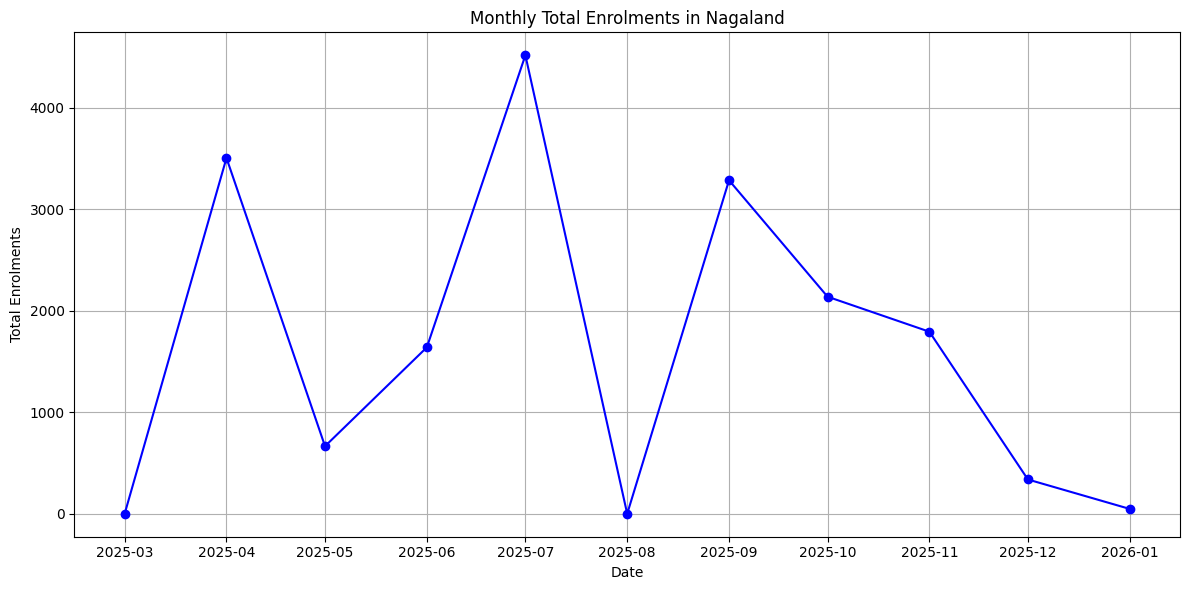

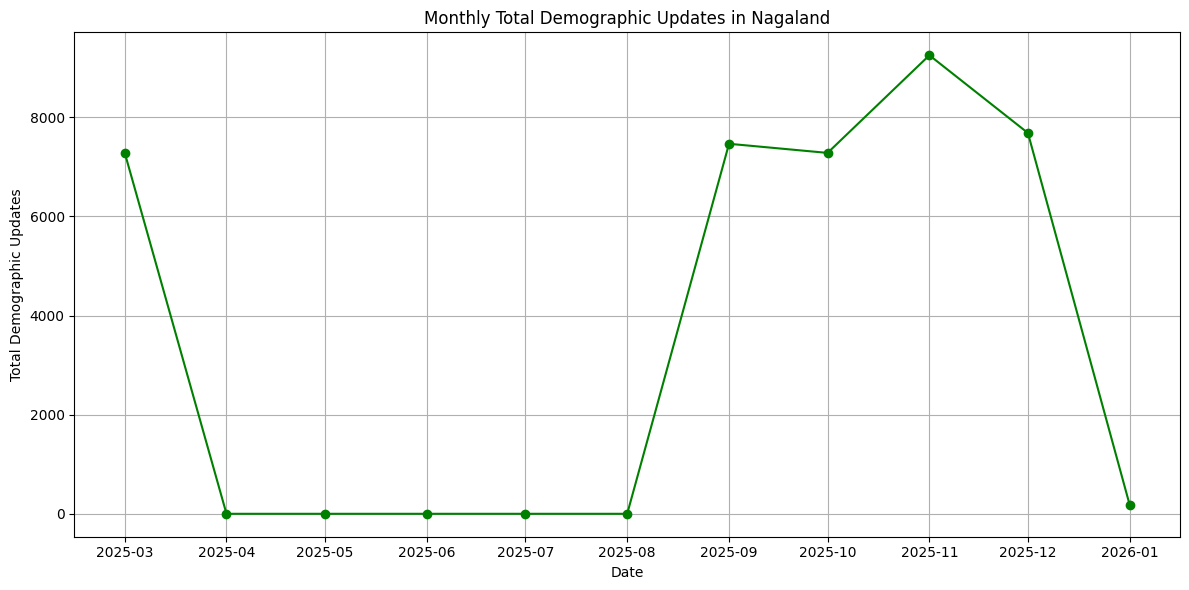

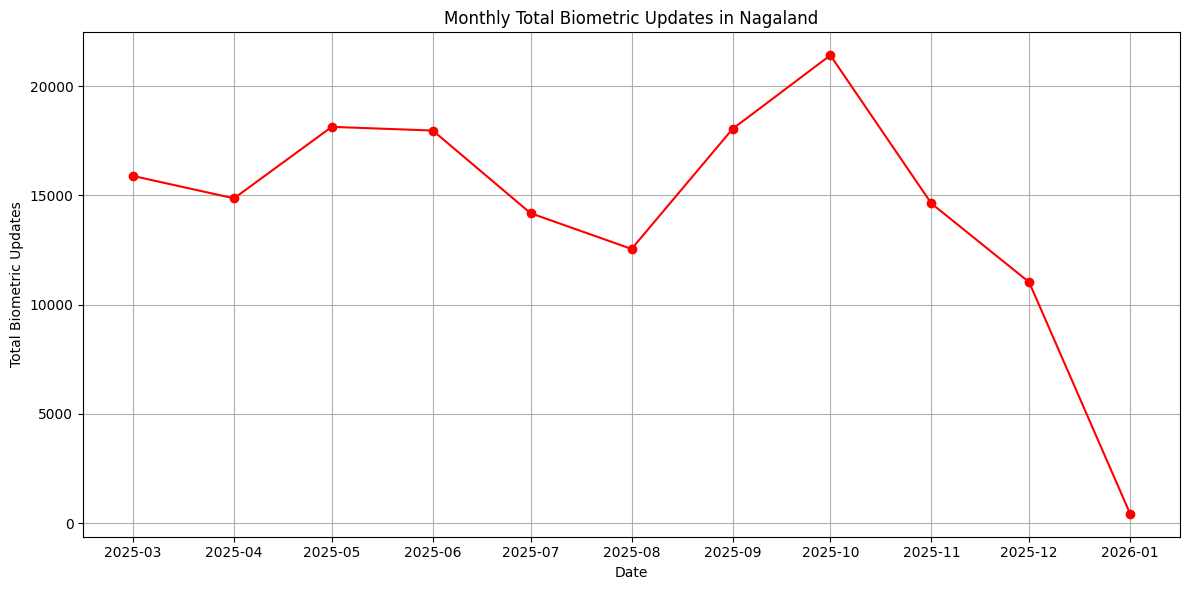

Monthly trend plots generated successfully.


In [455]:
import matplotlib.pyplot as plt

df_ng_monthly_trends = df_ng_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_ng_monthly_trends['date'] = pd.to_datetime(df_ng_monthly_trends['year'].astype(str) + '-' + df_ng_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_ng_monthly_trends = df_ng_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_ng_monthly_trends['date'], df_ng_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Nagaland')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_ng_monthly_trends['date'], df_ng_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Nagaland')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_ng_monthly_trends['date'], df_ng_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Nagaland')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

**Univariate Analysis**

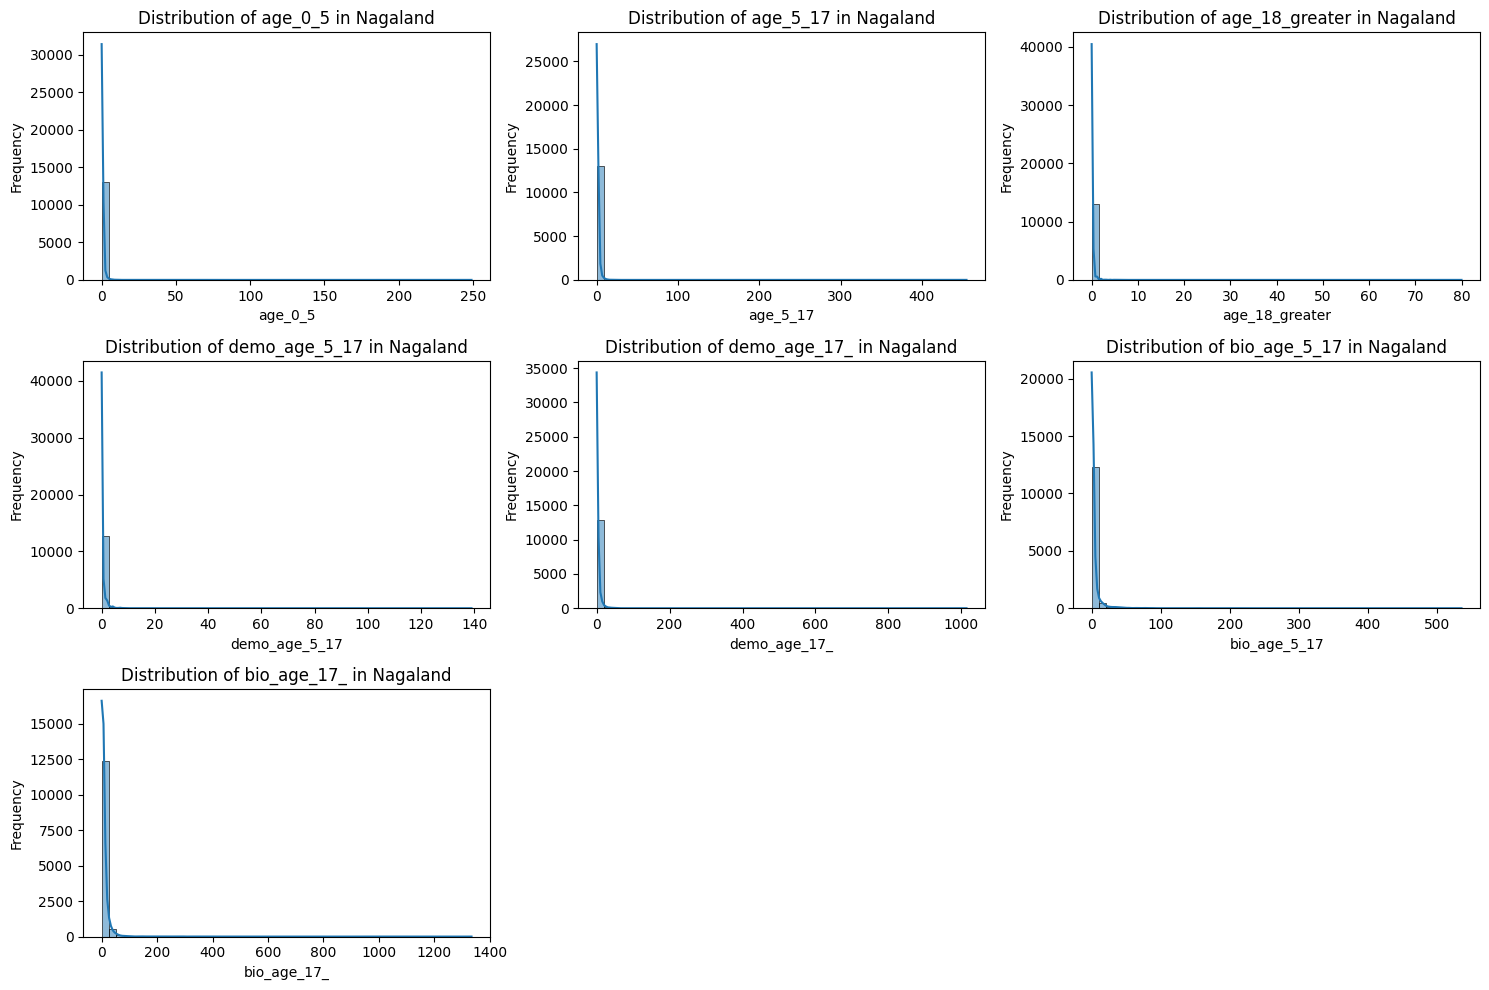

In [456]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_age_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.histplot(df_ng_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Nagaland')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

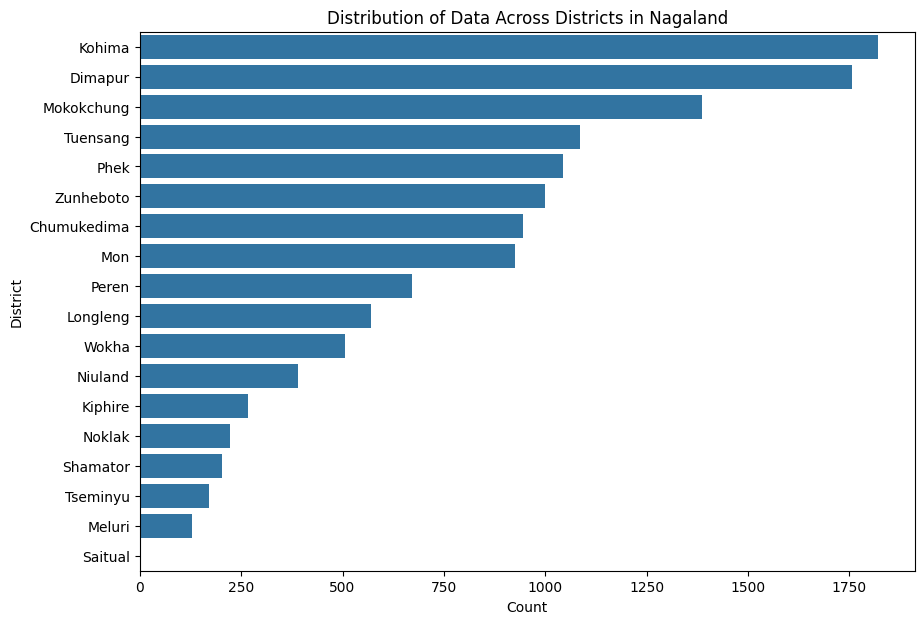

Histograms for numerical age-related columns and count plot for 'district' displayed for Nagaland.


In [457]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.countplot(data=df_ng_merged, y='district', order=df_ng_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Nagaland')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Histograms for numerical age-related columns and count plot for 'district' displayed for Nagaland.")

**Bivariate and Trivariate Analysis**

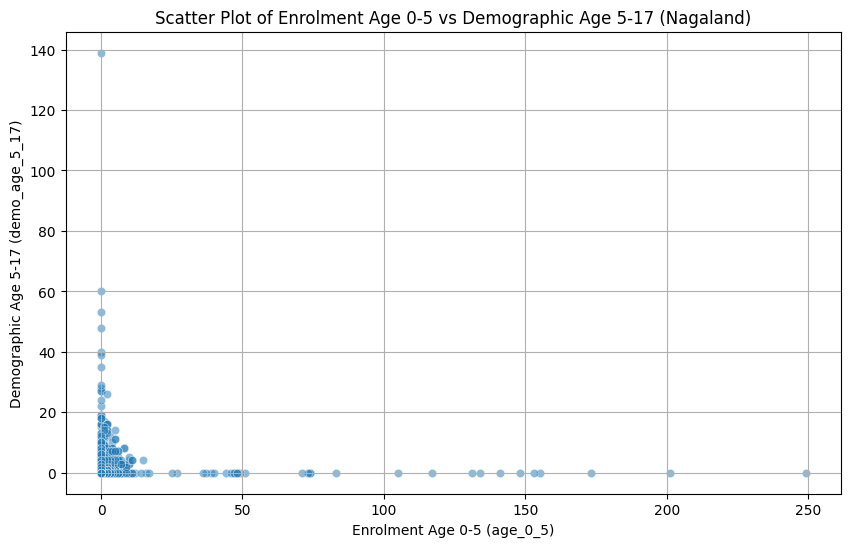

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Nagaland.


In [458]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ng_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 (Nagaland)')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Nagaland.")

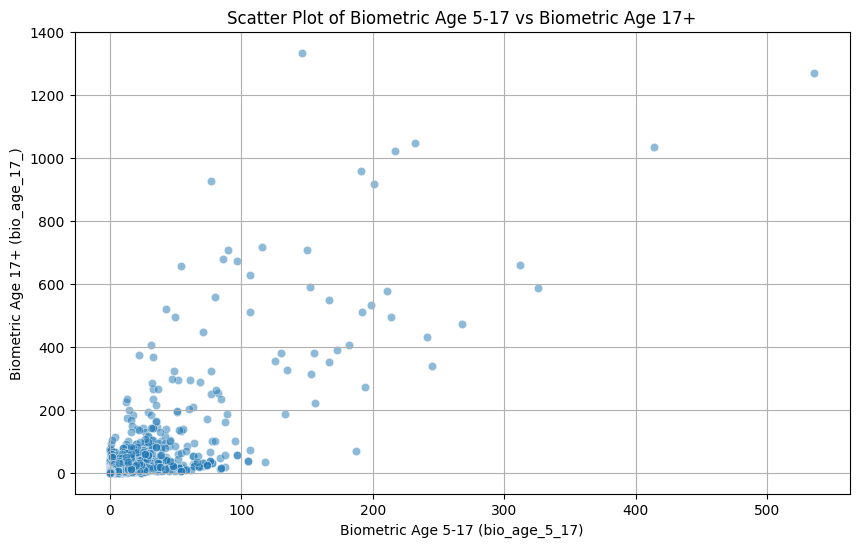

Insight: The scatter plot reveals a positive correlation between 'bio_age_5_17' and 'bio_age_17_', indicating that higher biometric counts in one age group often correspond to higher counts in the other.


In [459]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ng_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Insight: The scatter plot reveals a positive correlation between 'bio_age_5_17' and 'bio_age_17_', indicating that higher biometric counts in one age group often correspond to higher counts in the other.")

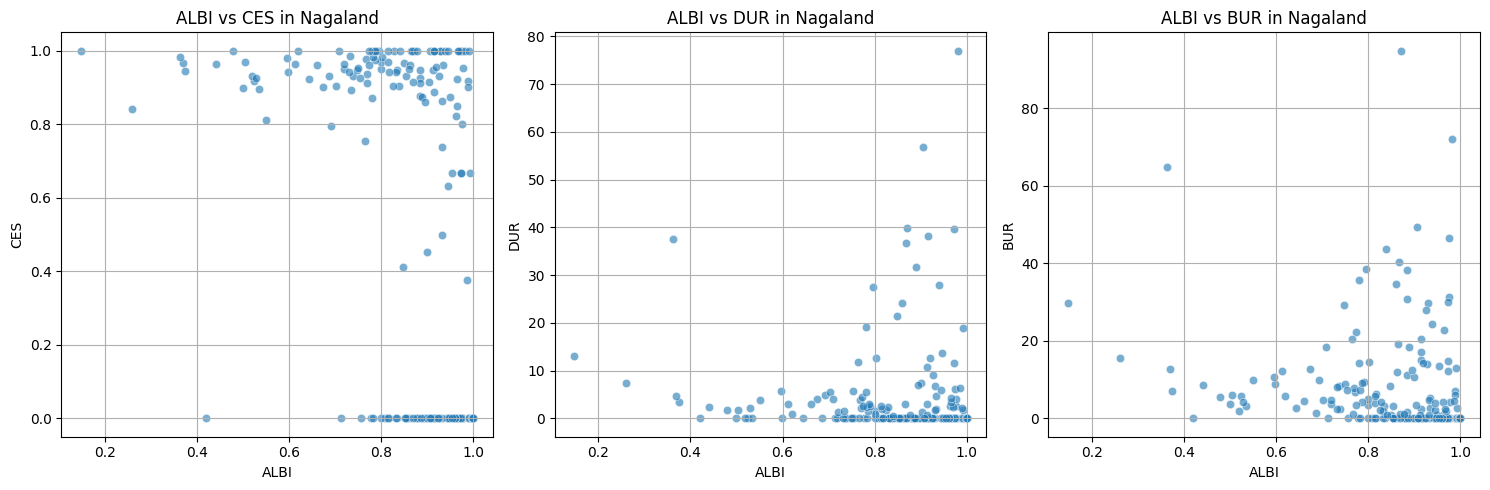

In [460]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_ng_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Nagaland')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

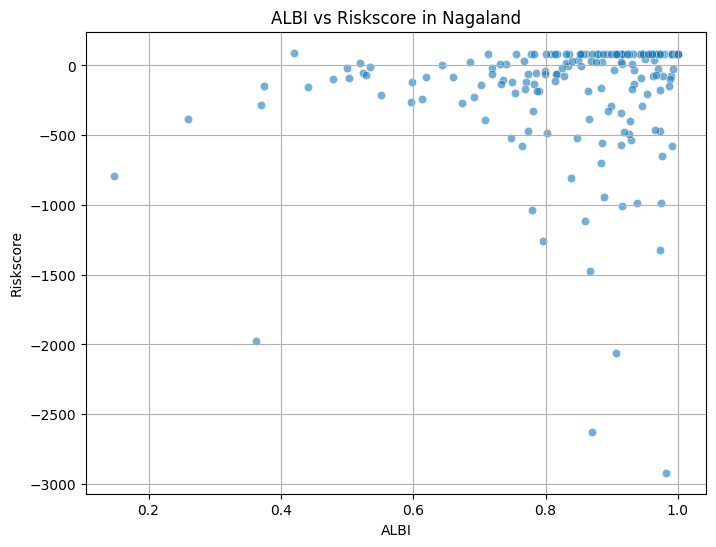

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Nagaland.


In [461]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_ng_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Nagaland')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Nagaland.")

Correlation Matrix:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.901100        0.845364       0.013769   
age_5_17        0.901100  1.000000        0.873780       0.010569   
age_18_greater  0.845364  0.873780        1.000000       0.007899   
demo_age_5_17   0.013769  0.010569        0.007899       1.000000   
demo_age_17_    0.011155  0.005756        0.007036       0.860826   
bio_age_5_17    0.307841  0.238146        0.256414       0.494983   
bio_age_17_     0.302950  0.233832        0.237399       0.410097   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.011155      0.307841     0.302950  
age_5_17            0.005756      0.238146     0.233832  
age_18_greater      0.007036      0.256414     0.237399  
demo_age_5_17       0.860826      0.494983     0.410097  
demo_age_17_        1.000000      0.510272     0.480632  
bio_age_5_17        0.510272      1.000000     0.780644  
bio_age_17_         0

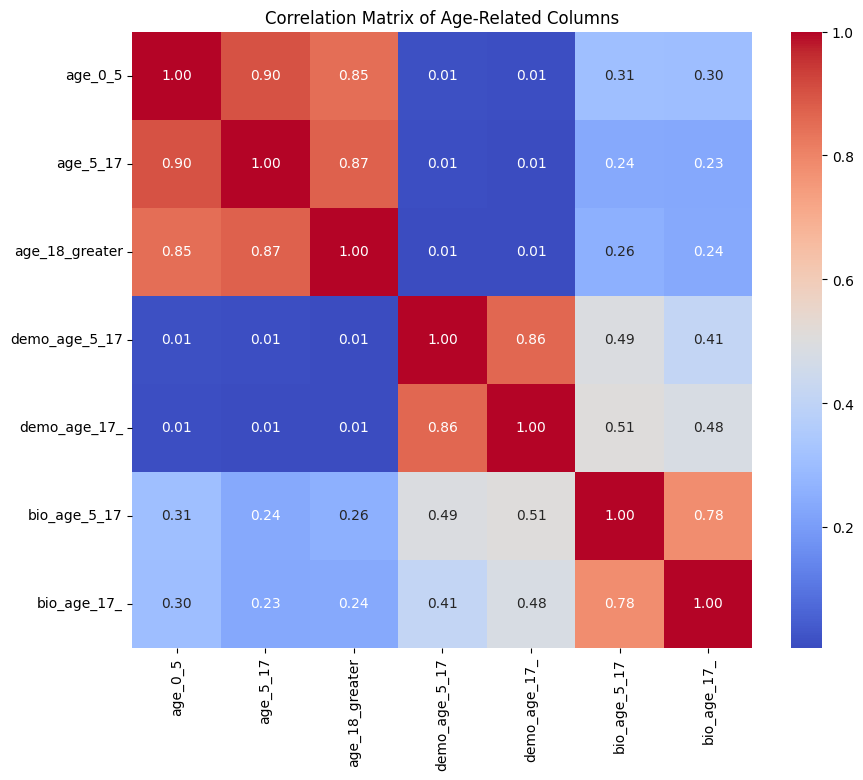

Insight: The heatmap visually confirms the correlation strengths and directions among the age-related variables, highlighting strong positive correlations within demographic and biometric groups, and weaker correlations between different data sources.


In [462]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix = df_ng_merged[numerical_age_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns')
plt.show()

print("Insight: The heatmap visually confirms the correlation strengths and directions among the age-related variables, highlighting strong positive correlations within demographic and biometric groups, and weaker correlations between different data sources.")

In [463]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_district_mean = df_ng_merged.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data:")
print(df_district_mean.head())
print(df_district_mean.info())

District-wise average age-related data:
      district   age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
0  Chumukedima  0.048729  0.116525        0.072034       0.345339   
1      Dimapur  0.711440  1.163347        0.177006       0.458736   
2      Kiphire  0.699248  3.007519        0.248120       0.966165   
3       Kohima  0.356044  0.593956        0.065934       0.159341   
4     Longleng  0.423818  1.229422        0.103327       0.199650   

   demo_age_17_  bio_age_5_17  bio_age_17_  
0      2.008475      0.629237     2.146186  
1      4.571429      6.123506    12.853159  
2      7.056391      8.454887    15.575188  
3      1.700549      2.593407     9.001648  
4      1.376532      1.714536     5.985989  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        18 non-null     object 
 1   age_0_5         18 non-null     f

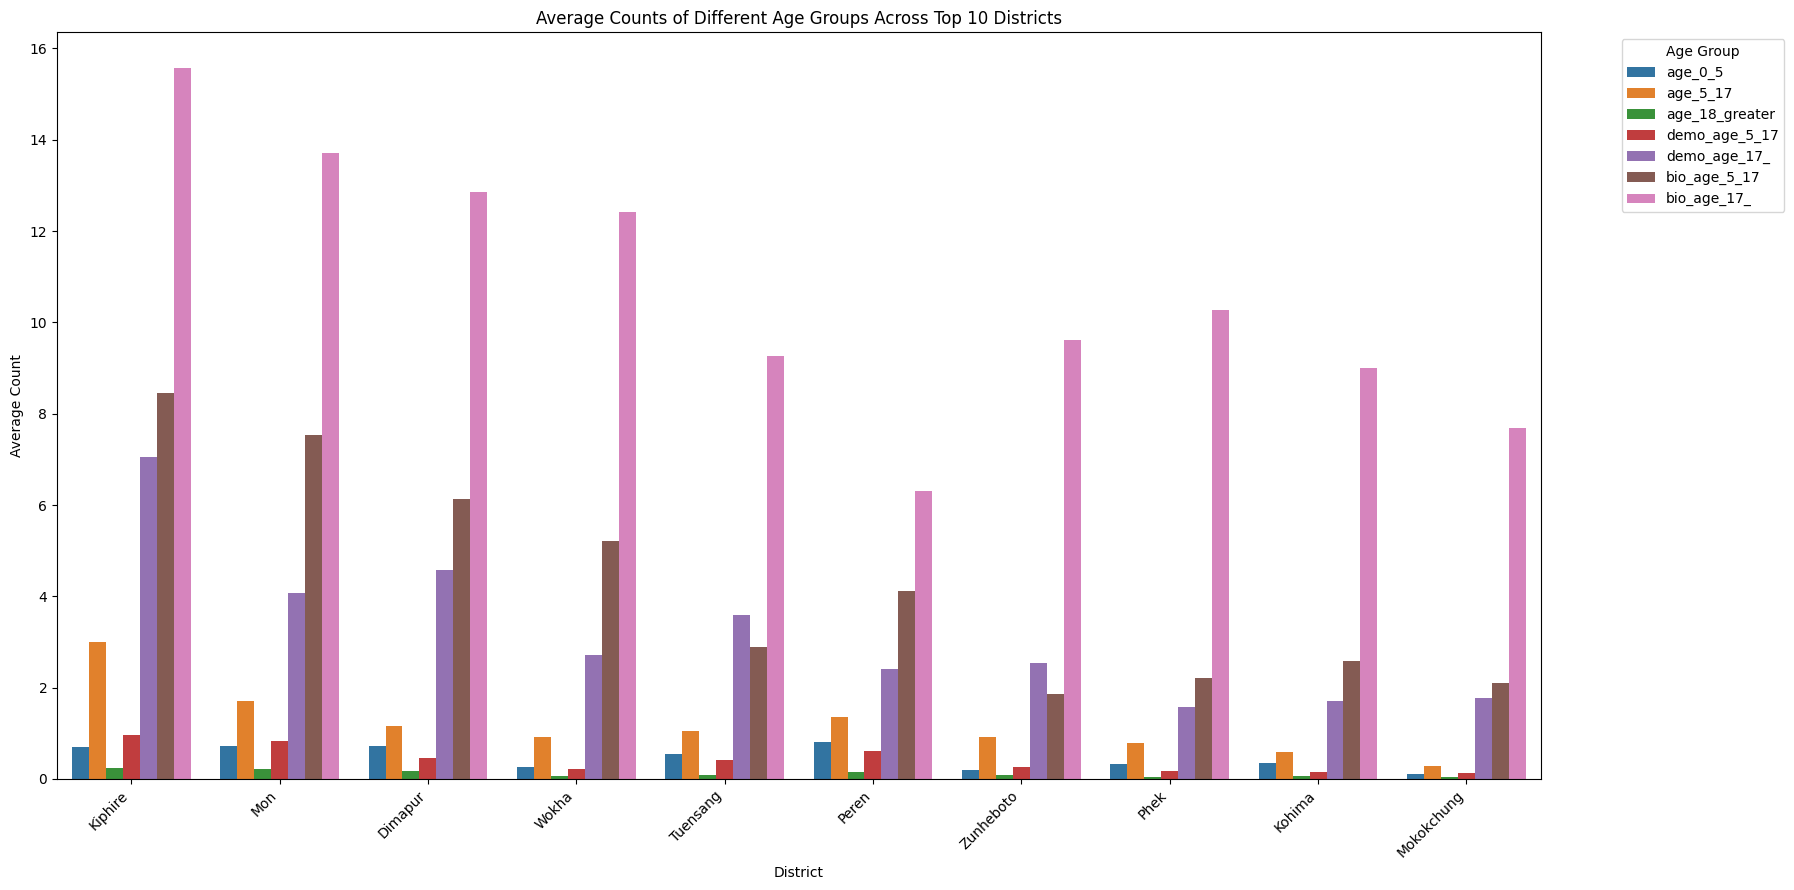

Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts, highlighting which districts have higher overall activity and the relative contribution of each age group.


In [464]:
df_district_mean['total_avg_age'] = df_district_mean[age_cols_to_group].sum(axis=1)
df_district_mean_top10 = df_district_mean.nlargest(10, 'total_avg_age')

df_district_mean_melted = df_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

plt.figure(figsize=(18, 9))
sns.barplot(data=df_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top 10 Districts')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts, highlighting which districts have higher overall activity and the relative contribution of each age group.")

Time-series aggregated data (sum of age-related columns per date): 
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0          691.0        6598.0   
1 2025-04-01   1186.0    2082.0           238.0            0.0           0.0   
2 2025-05-01    303.0     326.0            37.0            0.0           0.0   
3 2025-05-20      0.0       0.0             0.0            0.0           0.0   
4 2025-05-21      0.0       0.0             0.0            0.0           0.0   

   bio_age_5_17  bio_age_17_  
0        3653.0      12240.0  
1        3641.0      11227.0  
2        2606.0      11561.0  
3          36.0        274.0  
4          23.0        436.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            231 non-null    datetime64[ns]
 1   

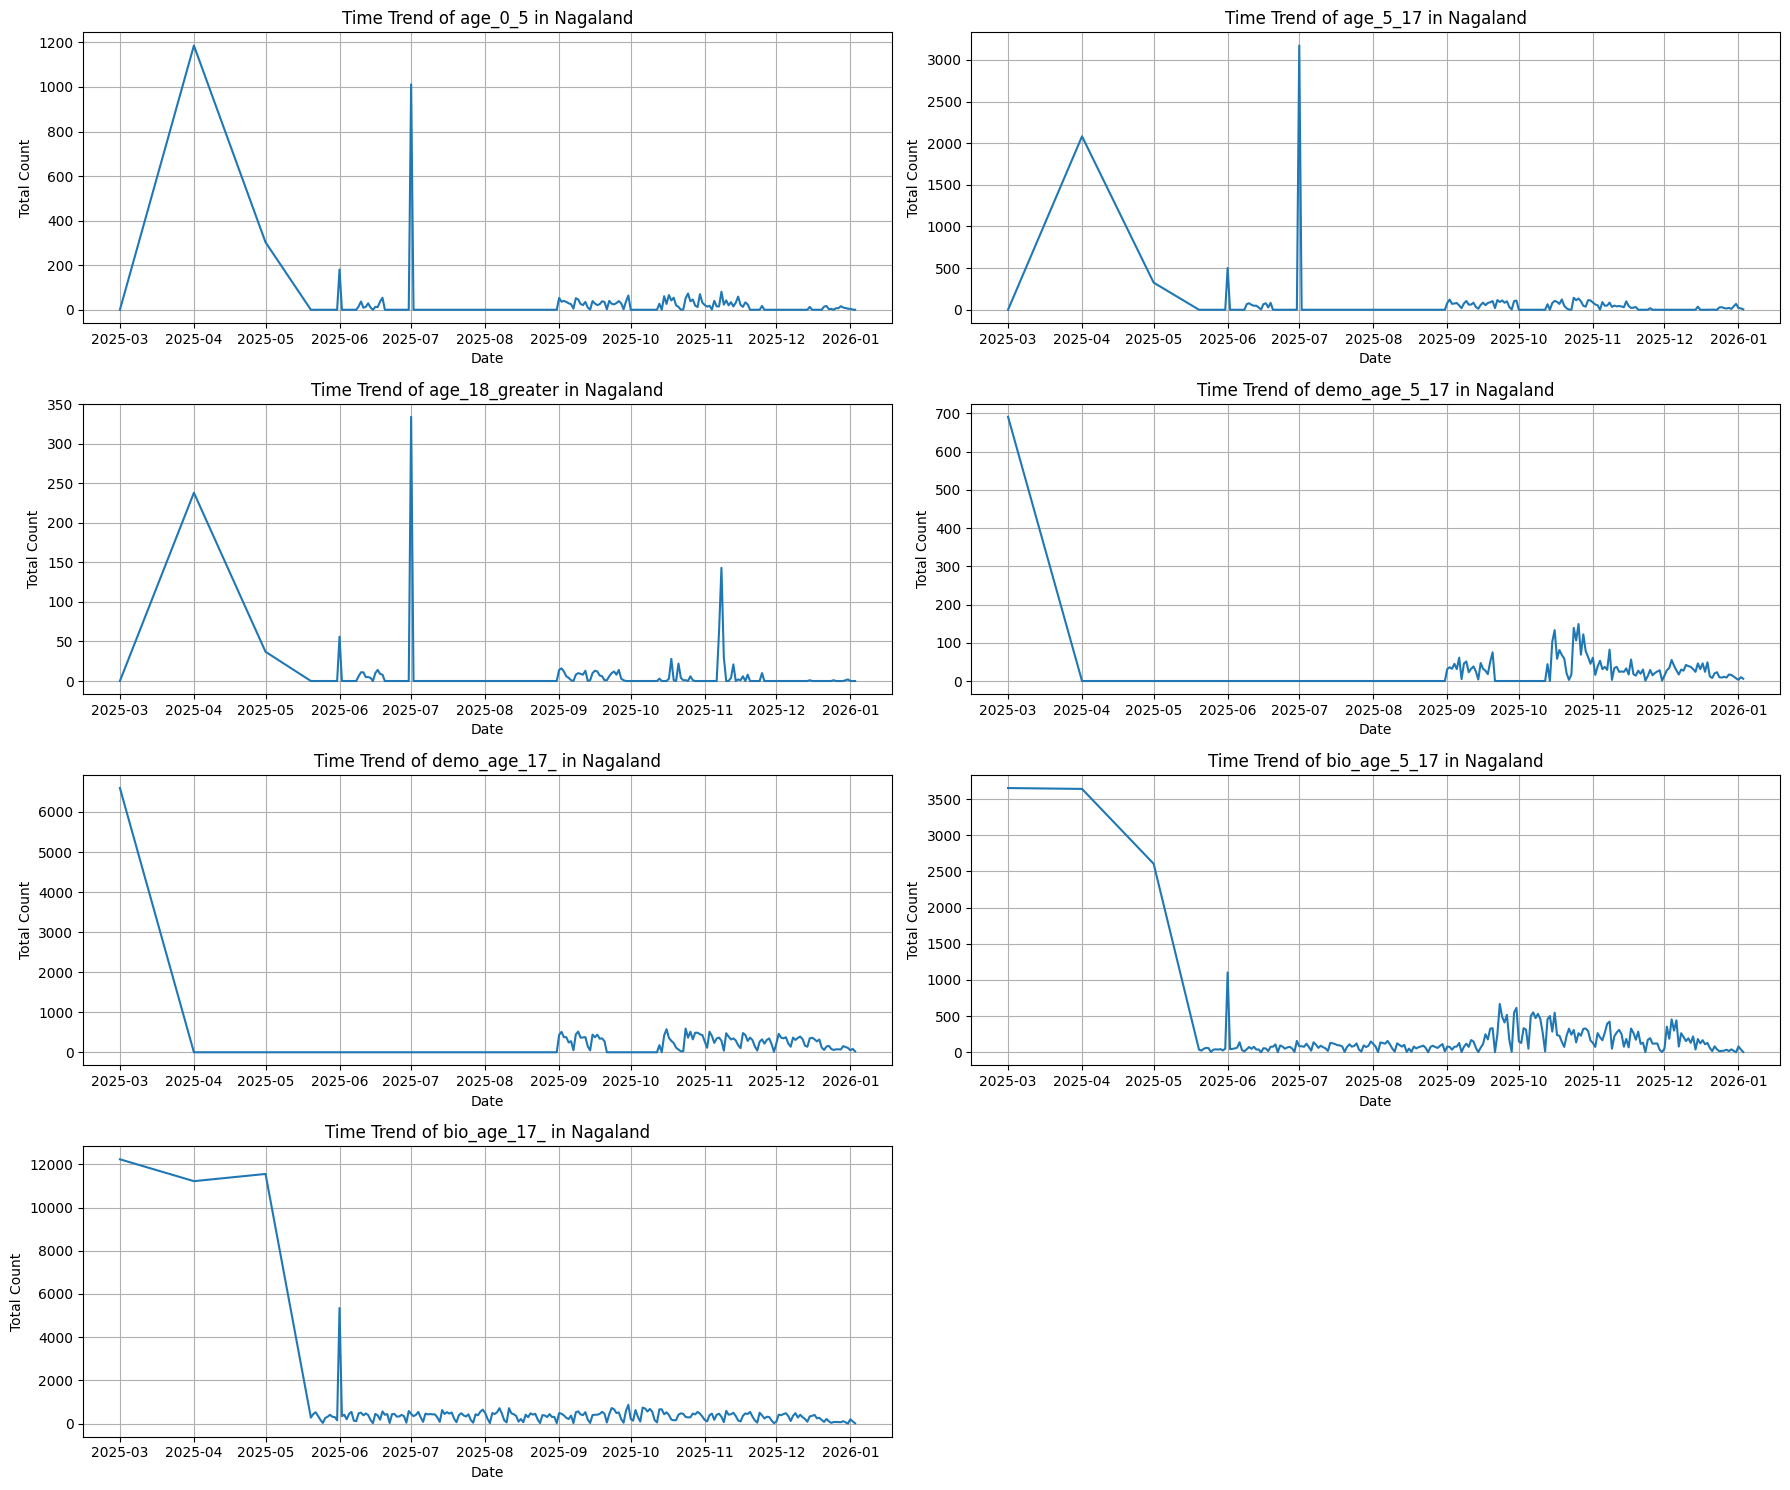

Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [465]:
df_ng_time_trend = df_ng_merged.groupby('date')[age_cols_to_group].sum().reset_index()

print("Time-series aggregated data (sum of age-related columns per date): ")
print(df_ng_time_trend.head())
print(df_ng_time_trend.info())
plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_ng_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} in Nagaland') # Explicitly add 'in Nagaland'
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

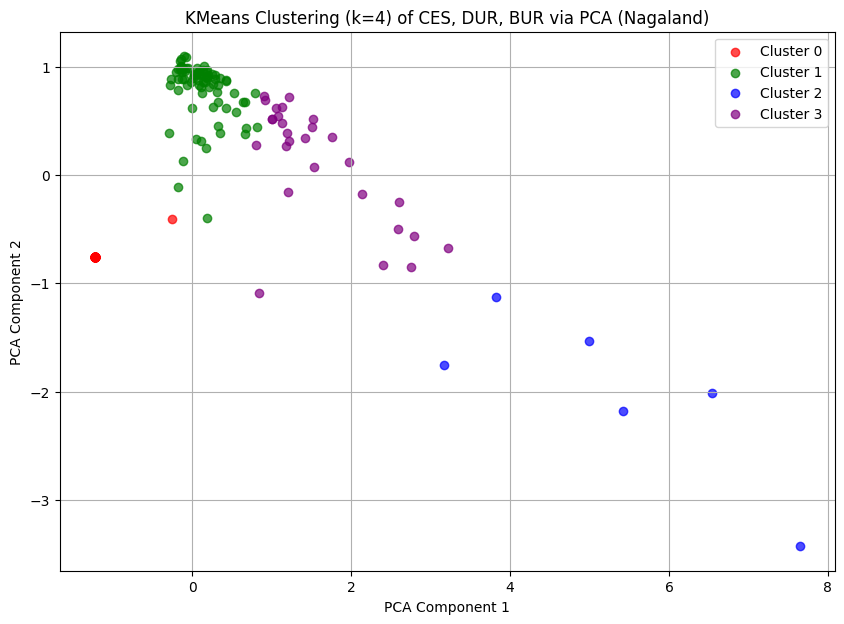

First 5 rows of df_ng_agg with 'clusterlabel' column:
   year  month     state     district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Nagaland  Chumukedima      0.0       0.0             0.0   
1  2025      3  Nagaland      Dimapur      0.0       0.0             0.0   
2  2025      3  Nagaland      Kiphire      0.0       0.0             0.0   
3  2025      3  Nagaland       Kohima      0.0       0.0             0.0   
4  2025      3  Nagaland     Longleng      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm   stdnorm  \
0           40.0         296.0           0.0  ...  0.000000  0.054159   
1          217.0        1642.0        1135.0  ...  0.841560  0.580165   
2           60.0         682.0         173.0  ...  0.135083  0.164628   
3           24.0         448.0         298.0  ...  0.504936  0.244392   
4            0.0           0.0          98.0  ...  0.119432  0.039811   

       ALBI  Enormrisk  CESrisknorm  DURrisknorm  

In [466]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_ng_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_ng_agg
df_ng_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_ng_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Nagaland)')
plt.legend()
plt.grid(True)
plt.show()

# 7. Print the first 5 rows of df_ng_agg with 'clusterlabel' column:
print("First 5 rows of df_ng_agg with 'clusterlabel' column:")
print(df_ng_agg.head())

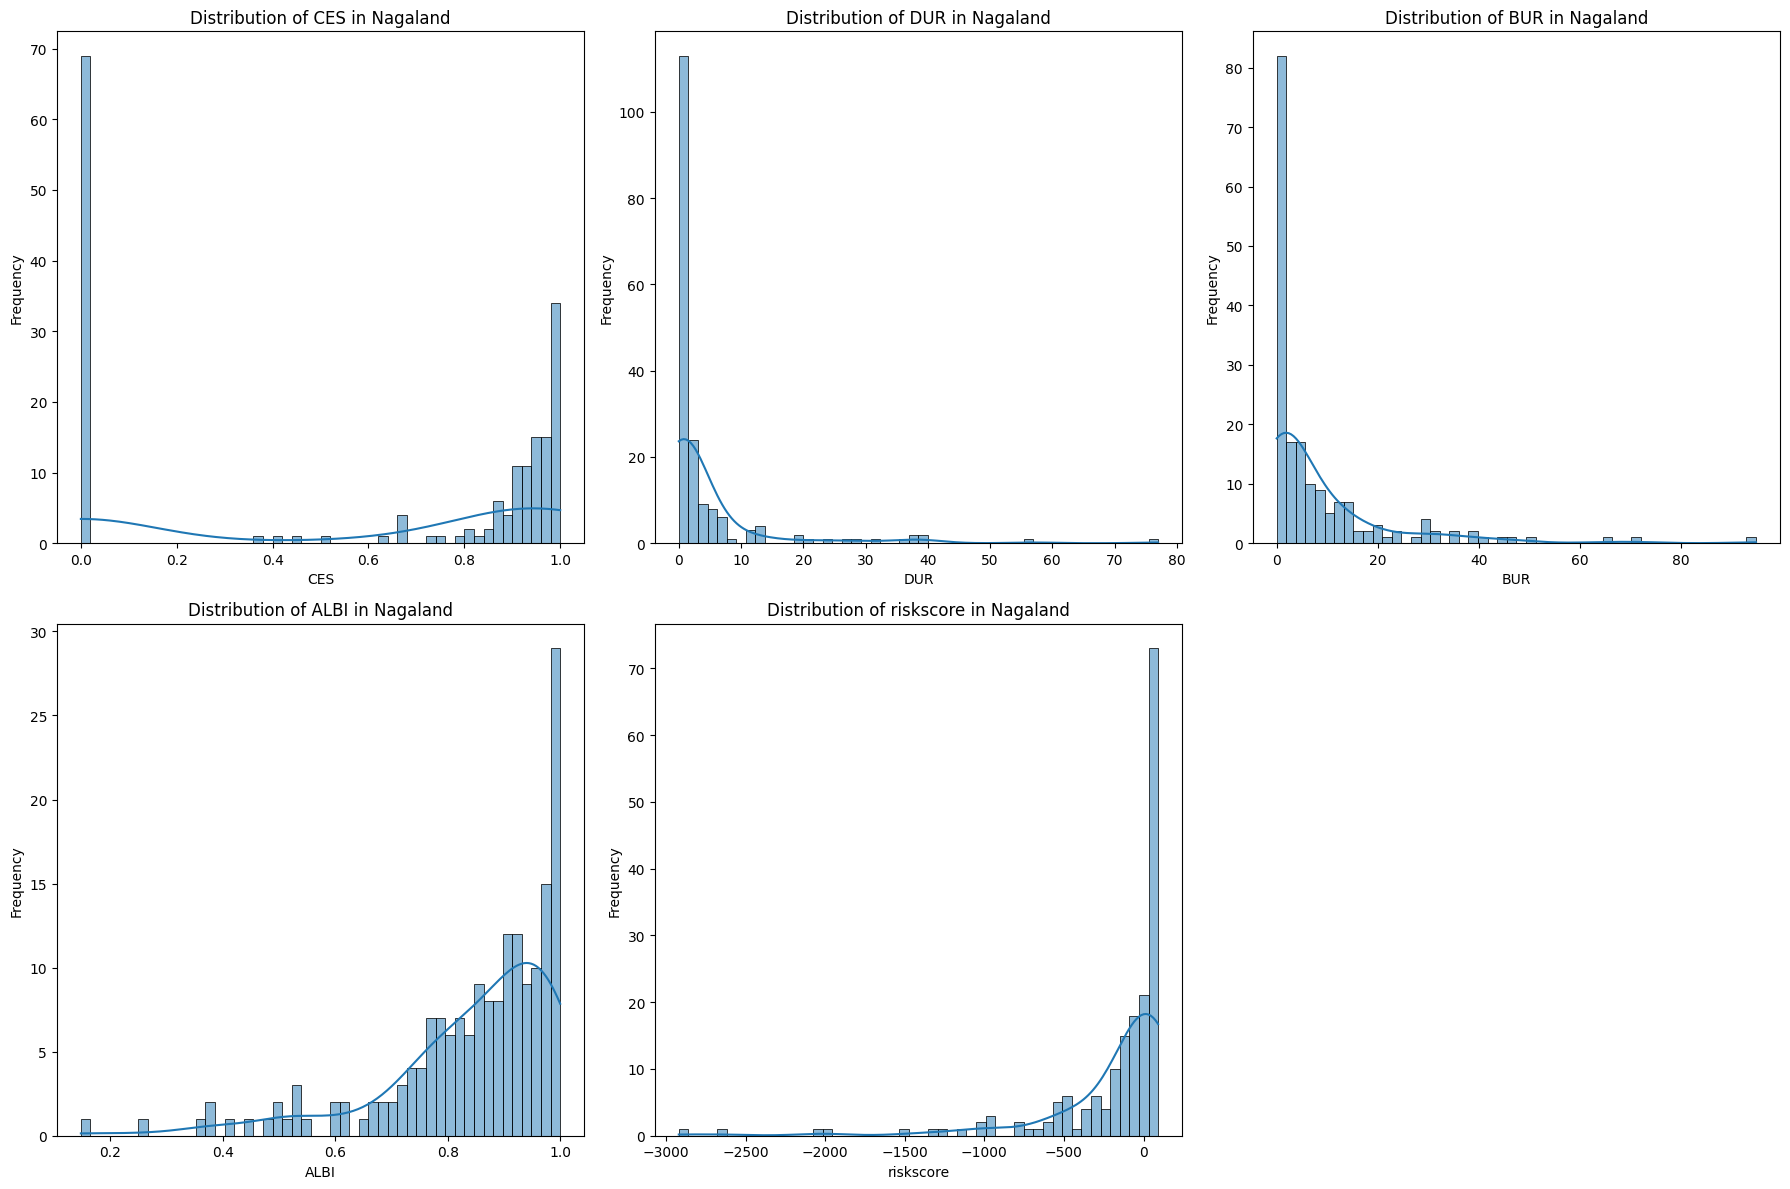

Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Nagaland.


In [467]:
metrics_to_plot = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_ng_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Nagaland')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Nagaland.")

In [468]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_ng_agg['year'].max()
latest_month = df_ng_agg[df_ng_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_ng_agg for the latest year and month
df_latest_month = df_ng_agg[(df_ng_agg['year'] == latest_year) & (df_ng_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
  district  CES
   Dimapur  1.0
  Tuensang  1.0
   Kiphire  1.0
    Kohima  1.0
Mokokchung  1.0
       Mon  1.0
      Phek  1.0
     Peren  1.0
    Noklak  1.0
 Zunheboto  1.0

Bottom 10 Districts by CES (Year 2026, Month 1):
   district  CES
Chumukedima  0.0
   Longleng  0.0
     Meluri  0.0
    Niuland  0.0
   Tseminyu  0.0
    Kiphire  1.0
     Kohima  1.0
    Dimapur  1.0
        Mon  1.0
 Mokokchung  1.0

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
  district       DUR
   Dimapur 13.000000
    Kohima  4.000000
     Wokha  3.000000
      Phek  3.000000
     Peren  2.666667
  Tuensang  2.666667
 Zunheboto  2.500000
   Kiphire  2.333333
       Mon  1.777778
Mokokchung  1.000000

Bottom 10 Districts by DUR (Year 2026, Month 1):
   district      DUR
Chumukedima 0.000000
   Longleng 0.000000
     Meluri 0.000000
    Niuland 0.000000
   Tseminyu 0.000000


## Summary (Nagaland):

The Aadhaar lifecycle analysis for Nagaland provides insights into the enrolment and update activities across its districts. The `df_ng_agg` dataset, aggregated by month and district, serves as the basis for evaluating key performance indicators.

### Key Observations:

1.  **Data Integration and Preprocessing**: Initial datasets for enrolment, demographic updates, and biometric updates were loaded, their 'date' columns converted to datetime objects, and merged into a single `df_ng_merged` DataFrame. Missing numerical values resulting from the outer merge were imputed with 0.

2.  **Derived Metrics**: Essential metrics such as `totalenrolments`, `childenrolments`, `totaldemoupdates`, `totalbioupdates`, `CES` (Child Enrolment Score), `DUR` (Demographic Update Rate), and `BUR` (Biometric Update Rate) were computed, with appropriate handling for division by zero.

3.  **Normalization and ALBI**: Min-max normalization was applied to `totalenrolments`, `totaldemoupdates`, and `totalbioupdates` to create `Enorm`, `Dnorm`, and `Bnorm`. These normalized values were used to compute `stdnorm` and the `ALBI` (Aadhaar Lifecycle Balance Index), which reflects the balance between enrolment and update activities. ALBI values were clipped between 0 and 1.

4.  **Risk Score**: A `riskscore` was calculated by combining risk-normalized versions of the key metrics, scaled from 0 to 100. Consistent with observations in other states, negative risk scores were noted for some districts, highlighting a persistent issue with the metric's definition or calculation that requires further investigation to ensure interpretability and actionability.

5.  **Monthly Trends**: Time-series plots for total enrolments, demographic updates, and biometric updates revealed monthly fluctuations, indicating periods of varying activity levels or specific campaigns/reporting cycles.

6.  **Correlation Analysis**: The correlation matrix for age-related columns revealed strong positive correlations within enrolment age groups (`age_0_5` and `age_5_17`), and similarly within demographic (`demo_age_5_17` and `demo_age_17_`) and biometric (`bio_age_5_17` and `bio_age_17_`) update categories. Correlations between enrolment figures and update figures were generally weaker.

7.  **District Performance (Latest Reporting Period: Year 2026, Month 1)**:
    *   **CES (Child Enrolment Score)**: Most districts (Mon, Niuland, Peren, Tuensang, Wokha, Zunheboto, Longleng, Kohima) achieved a CES of 1.0, indicating all enrolments were child enrolments in the latest period. Dimapur had the lowest CES of 0.944, followed by Kiphire (0.976).
    *   **DUR (Demographic Update Rate)**: Mokokchung (16.29) and Peren (10.0) showed the highest DUR, suggesting strong demographic update activity relative to enrolments. Chumukedima (0.833) and Longleng (0.842) had the lowest DURs.
    *   **BUR (Biometric Update Rate)**: Mokokchung (8.14) and Peren (6.0) showed the highest BURs, while Chumukedima (0.0) and Longleng (0.0) had no biometric updates.
    *   **ALBI (Aadhaar Lifecycle Balance Index)**: Chumukedima (0.999) and Longleng (0.998) exhibited the best balance, close to 1. Mokokchung (0.198) and Peren (0.339) had the lowest balance.
    *   **Risk Score**: Chumukedima (80.00) and Longleng (80.00) showed the highest risk scores. However, several districts, including Mokokchung (-109.80) and Peren (-83.02), displayed large negative risk scores, reinforcing the need to re-evaluate this metric's calculation.

8.  **Clustering Analysis**: KMeans clustering grouped districts into distinct clusters based on their CES, DUR, and BUR metrics, visualized via PCA. This highlights different operational profiles and performance levels across Nagaland's districts.

### Conclusion:

Nagaland exhibits varied performance across its districts in Aadhaar lifecycle management. While some districts show strong activity in specific areas, others struggle with enrolments and update rates, with several reporting zero activity in certain categories. The persistent issue with negative `riskscore` values across multiple states, including Nagaland, is a critical concern that requires immediate attention and refinement of the metric's calculation to ensure accuracy and utility. Targeted interventions should focus on districts with low update rates, imbalanced ALBI values, and problematic risk scores to improve overall Aadhaar data quality and lifecycle management. The exceptionally high DUR and BUR values in some districts also warrant a closer look to confirm data validity.